# Gráficos para visualizar cantidades

Código para la creación de figuras que aparecen en el material troncal del módulo.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
import os

%matplotlib inline

In [2]:
DATA_PATH = "/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/"

for dirname, _, filenames in os.walk(DATA_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/prices-split-adjusted.csv
/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/fundamentals.csv
/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/prices.csv
/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/securities.csv


In [3]:
FUNDAMENTALS_PATH = "/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/fundamentals.csv"
SECURITIES_PATH = "/Users/bernardogarcia/GitHub/MF-data_viz/data/nyse_data/securities.csv"

In [4]:
# load raw data
fundamentals = pd.read_csv(FUNDAMENTALS_PATH)
securities = pd.read_csv(SECURITIES_PATH)
securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [5]:
fundamentals.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

# Bar plots
AMZN total revenue from 2013 to 2016

In [6]:
# data
data = fundamentals.loc[fundamentals["Ticker Symbol"] == "AMZN", ["Period Ending", "Ticker Symbol", "Total Revenue"]] \
    .sort_values("Period Ending")
data.head()

,Period Ending,Ticker Symbol,Total Revenue
120,2013-12-31,AMZN,7.445200e+10
121,2014-12-31,AMZN,8.898800e+10
122,2015-12-31,AMZN,1.070060e+11
123,2016-12-31,AMZN,1.359870e+11


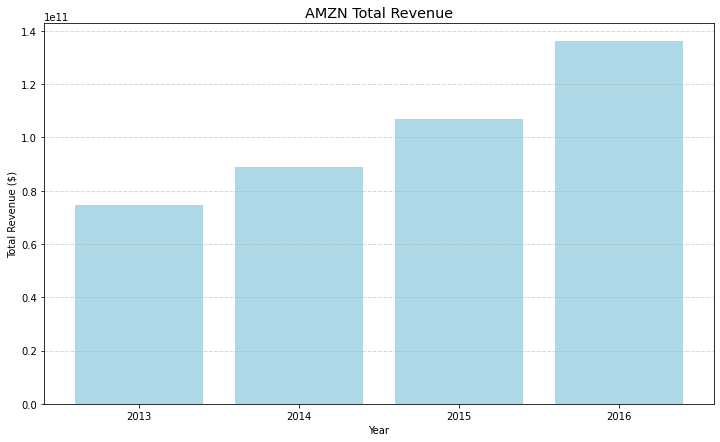

In [7]:
# prepare data for plotting
dates = data["Period Ending"].values
years =[pd.to_datetime(str(date)).strftime("%Y")for date in dates] 
revenue = data["Total Revenue"].values
# vertical bar plot
fig, ax = plt.subplots(figsize=(12, 7))
#plt.xticks(year, year, rotation=90)
ax.bar(years, revenue, color="lightblue")
plt.rc('font', size=12)  
plt.grid(axis="y", which="both", linestyle='-.', linewidth=0.5)  
plt.xlabel("Year")
plt.ylabel("Total Revenue ($)")
plt.title("AMZN Total Revenue")
plt.show();

**Total revenue 2014**

- Sector: Health Care
- Sub Industry: Health Care Equipment

In [8]:
data_secu = securities.loc[securities["GICS Sector"] == "Health Care"] \
    .loc[securities["GICS Sub Industry"] == "Health Care Equipment", ["Ticker symbol", "Security"]]

tickers = data_secu["Ticker symbol"].values.tolist()
# mapping tickers to securities
d = {ticker: sec for ticker, sec in zip(data_secu["Ticker symbol"].values, data_secu["Security"].values)}

# data
data = fundamentals.loc[fundamentals["Ticker Symbol"].isin(tickers), ["Ticker Symbol", "Period Ending", "Total Revenue"]]
# convert date
data["Period Ending"] = data["Period Ending"].map(lambda x: pd.to_datetime(str(x)).strftime("%Y"))
# 2014 year
data = data.loc[data["Period Ending"] == "2014"].sort_values("Total Revenue", ascending=True)
# add security name
data["security"] = data["Ticker Symbol"].map(lambda x: d[x])
data.head()

,Ticker Symbol,Period Ending,Total Revenue,security
829,IDXX,2014,1.485807e+09,IDEXX Laboratories
860,ISRG,2014,2.131700e+09,Intuitive Surgical Inc.
1282,PKI,2014,2.237219e+09,PerkinElmer
590,EW,2014,2.322900e+09,Edwards Lifesciences
777,HOLX,2014,2.530700e+09,Hologic


> Wrong

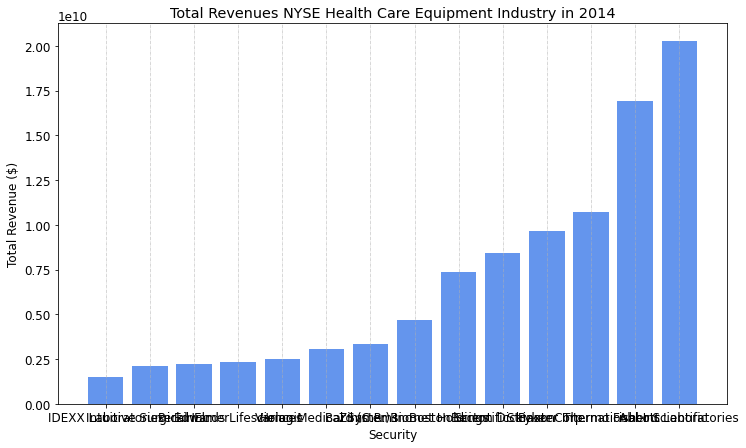

In [9]:
# prepare data for plotting
secs = data["security"].values
revenue = data["Total Revenue"].values
# vertical bar plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(secs, revenue, color="cornflowerblue")
plt.rc('font', size=12)  
plt.grid(axis="x", which="both", linestyle='-.', linewidth=0.5)  
plt.xlabel("Security")
plt.ylabel("Total Revenue ($)")
plt.title("Total Revenues NYSE Health Care Equipment Industry in 2014")
plt.show();

> Partial solution -> Rotate labels. But not visually attractive

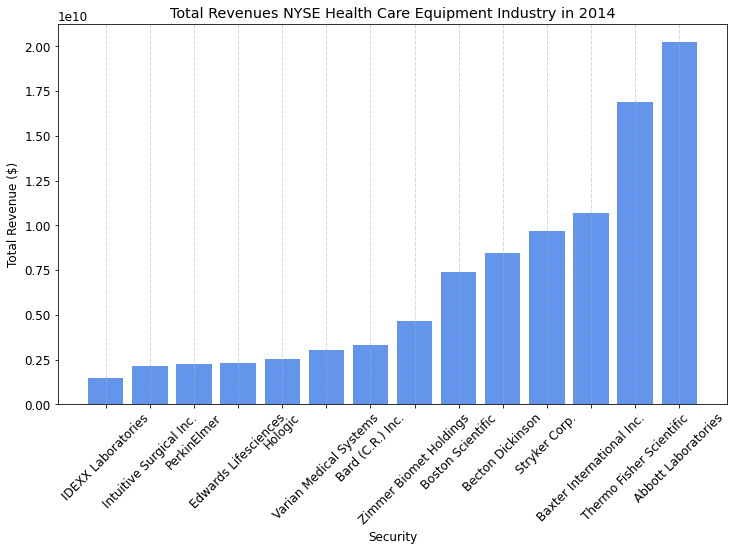

In [10]:
# prepare data for plotting
secs = data["security"].values
revenue = data["Total Revenue"].values
# vertical bar plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(secs, revenue, color="cornflowerblue")
plt.rc('font', size=12)  
plt.grid(axis="x", which="both", linestyle='-.', linewidth=0.5)
plt.xticks(rotation=45)
plt.xlabel("Security")
plt.ylabel("Total Revenue ($)")
plt.title("Total Revenues NYSE Health Care Equipment Industry in 2014")
plt.show();

> **Best chart**

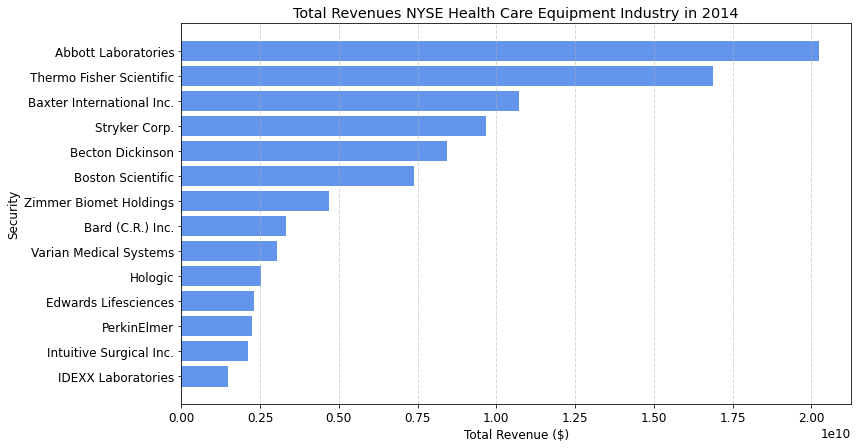

In [11]:
# prepare data for plotting
secs = data["security"].values
revenue = data["Total Revenue"].values
# vertical bar plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(secs, revenue, color="cornflowerblue")
plt.rc('font', size=12)  
plt.grid(axis="x", which="both", linestyle='-.', linewidth=0.5)  
plt.xlabel("Total Revenue ($)")
plt.ylabel("Security")
plt.title("Total Revenues NYSE Health Care Equipment Industry in 2014")
plt.show();

# Grouped and stacked bars

In [12]:
def group_by_age(x):
    if x < 15:
        return "A"
    elif x < 30:
        return "B"
    elif x < 45:
        return "C"
    else:
        return "D"

In [13]:
revenue = fundamentals.loc[:, ["Ticker Symbol", "Period Ending", "Total Revenue"]]
# convert date
revenue["Period Ending"] = revenue["Period Ending"].map(lambda x: pd.to_datetime(str(x)).strftime("%Y"))
# 2014 year
revenue = revenue.loc[revenue["Period Ending"] == "2014"].sort_values("Total Revenue", ascending=True) \
    .groupby("Ticker Symbol").sum()
revenue.head()

,Total Revenue
Ticker Symbol,
AAL,4.265000e+10
AAPL,1.827950e+11
ABBV,1.996000e+10
ABC,1.195691e+11
ABT,2.024700e+10


In [16]:
sectors = ['Health Care', 'Information Technology', 'Telecommunications Services','Energy']

secs = securities.loc[securities["GICS Sector"].isin(sectors), ["Ticker symbol", "GICS Sector", "Date first added"]].dropna()
secs["age"] = secs["Date first added"] \
    .map(lambda x: datetime.datetime.now().year - int(pd.to_datetime(str(x)).strftime("%Y")))
secs["age_group"] = secs["age"].map(group_by_age)
secs = secs.rename(columns={"Ticker symbol": "Ticker Symbol"}).set_index("Ticker Symbol")
secs.head()

,GICS Sector,Date first added,age,age_group
Ticker Symbol,,,,
ABT,Health Care,1964-03-31,57,D
ABBV,Health Care,2012-12-31,9,A
ACN,Information Technology,2011-07-06,10,A
ATVI,Information Technology,2015-08-31,6,A
ADBE,Information Technology,1997-05-05,24,B


In [17]:
# join datasets
data = revenue.join(secs, how="right").drop(["Date first added", "age"], axis=1).dropna()
data.head()

,Total Revenue,GICS Sector,age_group
Ticker Symbol,,,
ABT,2.024700e+10,Health Care,D
ABBV,1.996000e+10,Health Care,A
ATVI,4.408000e+09,Information Technology,A
ADBE,4.147065e+09,Information Technology,B
AKAM,1.963874e+09,Information Technology,A


In [18]:
data = data.groupby(["GICS Sector", "age_group"]).sum()
data

Total Revenue
GICS Sector                 age_group               
Energy                      A           3.512127e+11
                            C           4.089500e+10
                            D           7.637000e+09
Health Care                 A           1.357372e+11
                            B           1.505370e+11
                            C           2.237219e+09
                            D           9.726520e+10
Information Technology      A           1.960918e+11
                            B           1.629061e+11
                            C           1.850689e+11
                            D           1.125210e+11
Telecommunications Services A           6.777000e+09
                            C           2.595260e+11

In [19]:
groups = ["A", "B", "C", "D"]

# energy
s_1_dict = {idx: data.loc["Energy"].loc[idx].values[0] for idx in data.loc["Energy"].index}
s_1 = [s_1_dict[group] if group in s_1_dict else 0 for group in groups]
# Health Care
s_2_dict = {idx: data.loc["Health Care"].loc[idx].values[0] for idx in data.loc["Health Care"].index}
s_2 = [s_2_dict[group] if group in s_2_dict else 0 for group in groups]
# Information technology
s_3_dict = {idx: data.loc["Information Technology"].loc[idx].values[0] for idx in data.loc["Information Technology"].index}
s_3 = [s_3_dict[group] if group in s_3_dict else 0 for group in groups]
# Telecommuniations services
s_4_dict = {idx: data.loc["Telecommunications Services"].loc[idx].values[0] for idx in data.loc["Telecommunications Services"].index}
s_4 = [s_4_dict[group] if group in s_4_dict else 0 for group in groups]

In [20]:
# manually tweak some data to show a better viz
s_1[1] = 251212330000
s_4[1] = 32836500000.0
s_4[3] = 45942600000.0

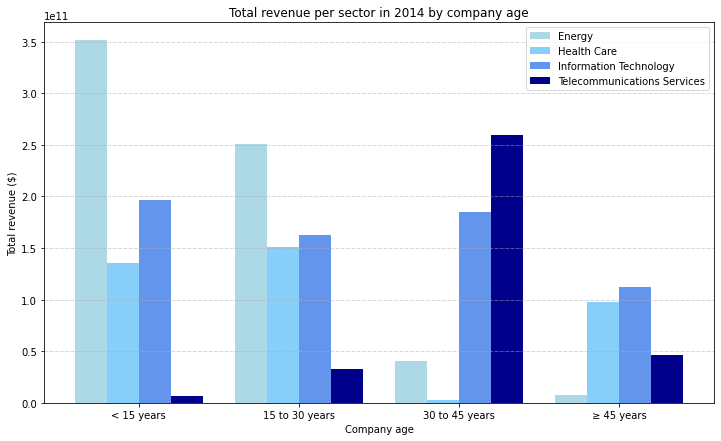

In [21]:
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(0, 2*len(groups), 2)
width = 0.4
p1 = ax.bar(x - 1.5 * width, s_1, width, color="lightblue", label="Energy")
p2 = ax.bar(x - width / 2, s_2, width, color="lightskyblue", label="Health Care")
p3 = ax.bar(x + width / 2, s_3, width, color="cornflowerblue", label="Information Technology")
p4 = ax.bar(x + 1.5 * width, s_4, width, color="darkblue", label="Telecommunications Services") 
ax.set_title("Total revenue per sector in 2014 by company age")
ax.set_xticks(x)
ax.set_xticklabels(["< 15 years", "15 to 30 years", "30 to 45 years", "≥ 45 years"])
plt.xlabel("Company age")
plt.ylabel("Total revenue ($)")
plt.grid(axis="y", which="both", linestyle='-.', linewidth=0.5)  
ax.legend(handles=[p1, p2, p3, p4])
plt.rc('font', size=12) 
plt.show();